[Bam-файлы и отчеты](https://drive.google.com/drive/folders/1athn52a93obOwfuHynDCRPRhjAPB80aO?usp=sharing)

# Установка FastQC

In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip
!chmod a+x FastQC/fastqc

--2025-02-16 00:03:18--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip’

fastqc_v0.11.9.zip  100%[===================>]   9.77M  7.21MB/s    in 1.4s    

2025-02-16 00:03:20 (7.21 MB/s) - ‘fastqc_v0.11.9.zip’ saved [10249221/10249221]

Archive:  fastqc_v0.11.9.zip
  inflating: FastQC/cisd-jhdf5.jar   
   creating: FastQC/Configuration/
  inflating: FastQC/Configuration/adapter_list.txt  
  inflating: FastQC/Configuration/contaminant_list.txt  
  inflating: FastQC/Configuration/limits.txt  
  inflating: FastQC/fastqc           
  inflating: FastQC/fastqc_icon.ico  
   creating: FastQC/Help/
   creating: FastQC/Help/1 Introductio

# Установка Bismark с зависимостями (+bowtie2, samtools)

In [ ]:
! pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
! conda install -c bioconda bismark

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bismark


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bismark-0.24.2             |       hdfd78af_0         7.7 MB  bioconda
    bowtie2-2.5.4              |       he96a11b_5        14.3 MB  bioconda
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    coreutils-8.25             |                1         9.1 MB  bioconda
    hisat2-2.2.1               |       h503566f_8        15.9 MB  bioconda
    htslib-1.21                |       h566b1c6_1         3.0 MB  bioconda
    libdeflate-1.23            |       h4ddbbb0_0      

In [ ]:
! samtools view


Usage: samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...]

Output options:
  -b, --bam                  Output BAM
  -C, --cram                 Output CRAM (requires -T)
  -1, --fast                 Use fast BAM compression (and default to --bam)
  -u, --uncompressed         Uncompressed BAM output (and default to --bam)
  -h, --with-header          Include header in SAM output
  -H, --header-only          Print SAM header only (no alignments)
      --no-header            Print SAM alignment records only [default]
  -c, --count                Print only the count of matching records
  -o, --output FILE          Write output to FILE [standard output]
  -U, --unoutput FILE, --output-unselected FILE
                             Output reads not selected by filters to FILE
  -p, --unmap                Set flag to UNMAP on reads not selected
                             then write to output file.
  -P, --fetch-pairs          Retrieve complete pairs even when outside of region

1. Скачиваем чтения из SRA с помощью SRAtoolkit или любым другим способом

2. Индексируем геном

3. Строим выравнивание

(Описание шагов 2-3 см https://www.bioinformatics.babraham.ac.uk/projects/bismark/Bismark_User_Guide.pdf)

Можно получать данные секвенировия с ENA. Например, https://www.ebi.ac.uk/ena/browser/view/SRR5836473

In [ ]:
! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
# ! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_2.fastq.gz

--2025-02-09 12:23:14--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
           => ‘SRR5836473_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR583/003/SRR5836473 ... done.
==> SIZE SRR5836473_1.fastq.gz ... 6856386252
==> PASV ... done.    ==> RETR SRR5836473_1.fastq.gz ... done.
Length: 6856386252 (6.4G) (unauthoritative)

SRR5836473_1.fastq. 100%[===================>]   6.38G  35.7MB/s    in 2m 53s  

2025-02-09 12:26:09 (37.9 MB/s) - ‘SRR5836473_1.fastq.gz’ saved [6856386252]



In [ ]:
!mkdir /content/fastqc_out
!gzip -dk SRR5836473_1.fastq.gz

In [ ]:
!./FastQC/fastqc -o fastqc_out SRR5836473_1.fastq

Started analysis of SRR5836473_1.fastq
Approx 5% complete for SRR5836473_1.fastq
Approx 10% complete for SRR5836473_1.fastq
Approx 15% complete for SRR5836473_1.fastq
Approx 20% complete for SRR5836473_1.fastq
Approx 25% complete for SRR5836473_1.fastq
Approx 30% complete for SRR5836473_1.fastq
Approx 35% complete for SRR5836473_1.fastq
Approx 40% complete for SRR5836473_1.fastq
Approx 45% complete for SRR5836473_1.fastq
Approx 50% complete for SRR5836473_1.fastq
Approx 55% complete for SRR5836473_1.fastq
Approx 60% complete for SRR5836473_1.fastq
Approx 65% complete for SRR5836473_1.fastq
Approx 70% complete for SRR5836473_1.fastq
Approx 75% complete for SRR5836473_1.fastq
Approx 80% complete for SRR5836473_1.fastq
Approx 85% complete for SRR5836473_1.fastq
Approx 90% complete for SRR5836473_1.fastq
Approx 95% complete for SRR5836473_1.fastq
Analysis complete for SRR5836473_1.fastq


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/SRR5836473_1_bismark_bt2_pe.bam /content/SRR5836473_1_bismark_bt2_pe.bam
!cp /content/drive/MyDrive/SRR3824222_1_bismark_bt2_pe.bam /content/SRR3824222_1_bismark_bt2_pe.bam
!cp /content/drive/MyDrive/SRR5836475_1_bismark_bt2_pe.bam /content/SRR5836475_1_bismark_bt2_pe.bam
!cp /content/drive/MyDrive/SRR5836473_1_bismark_bt2_PE_report.txt /content/SRR5836473_1_bismark_bt2_PE_report.txt
!cp /content/drive/MyDrive/SRR3824222_1_bismark_bt2_PE_report.txt /content/SRR3824222_1_bismark_bt2_PE_report.txt
!cp /content/drive/MyDrive/SRR5836475_1_bismark_bt2_PE_report.txt /content/SRR5836475_1_bismark_bt2_PE_report.txt

Mounted at /content/drive


In [ ]:
! ls -lh

total 42G
-rw-r--r-- 1 root root  21K Feb  9 12:32 condacolab_install.log
drwx------ 6 root root 4.0K Feb  9 15:06 drive
drwxr-xr-x 8 root root 4.0K Feb  9 12:06 FastQC
drwxr-xr-x 2 root root 4.0K Feb  9 13:11 fastqc_out
-rw-r--r-- 1 root root 9.8M Jan 15  2020 fastqc_v0.11.9.zip
drwxr-xr-x 1 root root 4.0K Feb  6 14:19 sample_data
-rw------- 1 root root 1.9G Feb  9 15:07 SRR3824222_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.8K Feb  9 15:07 SRR3824222_1_bismark_bt2_PE_report.txt
-rw------- 1 root root 769M Feb  9 15:06 SRR5836473_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.8K Feb  9 15:07 SRR5836473_1_bismark_bt2_PE_report.txt
-rw-r--r-- 1 root root  32G Feb  9 12:26 SRR5836473_1.fastq
-rw-r--r-- 1 root root 6.4G Feb  9 12:26 SRR5836473_1.fastq.gz
-rw------- 1 root root 1.2G Feb  9 15:07 SRR5836475_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.8K Feb  9 15:07 SRR5836475_1_bismark_bt2_PE_report.txt


In [ ]:
! samtools view SRR5836473_1_bismark_bt2_pe.bam | head

SRR5836473.41_41_length=140	99	chr11	40076664	0	140M	=	40076703	178	AATTTTTTTGGGGATTGTATTGAATTTGTAGATTGTTTTTGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATT	KKKKKKKKKKKKKKKFKKKKKKKKKKKKKKFKKKKKKKKKFKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKF7<77FF	NM:i:28	MD:Z:6G0A9C7C9C6C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C1	XM:Z:.................h.......x.........h......h.......hh.......h.........hx..hh...hh.....h.........h...hh..h..x......h..h........h...h..x.....h.	XR:Z:CT	XG:Z:CT
SRR5836473.41_41_length=140	147	chr11	40076703	0	139M	=	40076664	-178	TGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATTTGAAGTTTTTATTATATAGATTTTTTATTTTTTTAGTG	KKKKKAAFFFKKKKKKKKKKKKKFFKKKKKKKKKKFAFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKFKKKKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:31	MD:Z:3C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C8C4C3A4C

In [ ]:
! samtools sort SRR5836473_1_bismark_bt2_pe.bam -o sorted_8cell.bam
! samtools sort SRR3824222_1_bismark_bt2_pe.bam -o sorted_epiblast.bam
! samtools sort SRR5836475_1_bismark_bt2_pe.bam -o sorted_icm.bam

[bam_sort_core] merging from 4 files and 1 in-memory blocks...
[bam_sort_core] merging from 9 files and 1 in-memory blocks...
[bam_sort_core] merging from 5 files and 1 in-memory blocks...


In [ ]:
! samtools index  sorted_8cell.bam
! samtools index  sorted_epiblast.bam
! samtools index  sorted_icm.bam

In [ ]:
! samtools view sorted_8cell.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view sorted_epiblast.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view sorted_icm.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l

551
1344
797


In [ ]:
! samtools view sorted_8cell.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l
! samtools view sorted_epiblast.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l
! samtools view sorted_icm.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

194
565
274


In [ ]:
import pandas as pd
df = pd.DataFrame({
        'Образцы': ['8cell', 'epiblast', 'ICM'],
        'chr11:11347700-11367700': [551, 1344, 797],
        'chr11:40185800-40195800': [194, 565, 274]
     })
df

,Образцы,chr11:11347700-11367700,chr11:40185800-40195800
0,8cell,551,194
1,epiblast,1344,565
2,ICM,797,274


### Дедупликация

In [ ]:
! deduplicate_bismark  --bam  --paired  -o s_8_cell  SRR5836473_1_bismark_bt2_pe.bam

Output filename was given as: s_8_cell
Processing paired-end Bismark output file(s) (SAM format):
SRR5836473_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836473_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836473_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_8_cell.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR3824222_1.fq,SRR5836473_1.fq,SRR5836473_1.fq -2 SRR3824222_2.fq,SRR5836473_2.fq,SRR5836473_2.fq"
skipping header line:	@PG	ID:samtools	PN:samtools	PP:Bismark	VN:1.21	CL:/usr/lo

In [ ]:
! deduplicate_bismark  --bam  --paired  -o s_epiblast  SRR3824222_1_bismark_bt2_pe.bam

Output filename was given as: s_epiblast
Processing paired-end Bismark output file(s) (SAM format):
SRR3824222_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR3824222_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR3824222_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_epiblast.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR3824222_1.fq,SRR5836473_1.fq,SRR5836473_1.fq -2 SRR3824222_2.fq,SRR5836473_2.fq,SRR5836473_2.fq"
skipping header line:	@PG	ID:samtools	PN:samtools	PP:Bismark	VN:1.21	CL:/us

In [ ]:
! deduplicate_bismark  --bam  --paired  -o s_icm  SRR5836475_1_bismark_bt2_pe.bam

Output filename was given as: s_icm
Processing paired-end Bismark output file(s) (SAM format):
SRR5836475_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836475_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836475_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_icm.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR5836475_1.fq -2 SRR5836475_2.fq"
skipping header line:	@PG	ID:samtools	PN:samtools	PP:Bismark	VN:1.21	CL:/usr/local/bin/samtools view -h --threads 1 SRR5836475_1_bismark_bt2_pe.bam



In [ ]:
! ls

condacolab_install.log		     sorted_8cell.bam.bai
drive				     sorted_epiblast.bam
FastQC				     sorted_epiblast.bam.bai
fastqc_out			     sorted_icm.bam
fastqc_v0.11.9.zip		     sorted_icm.bam.bai
s_8_cell.deduplicated.bam	     SRR3824222_1_bismark_bt2_pe.bam
s_8_cell.deduplication_report.txt    SRR3824222_1_bismark_bt2_PE_report.txt
sample_data			     SRR5836473_1_bismark_bt2_pe.bam
s_epiblast.deduplicated.bam	     SRR5836473_1_bismark_bt2_PE_report.txt
s_epiblast.deduplication_report.txt  SRR5836473_1.fastq
s_icm.deduplicated.bam		     SRR5836473_1.fastq.gz
s_icm.deduplication_report.txt	     SRR5836475_1_bismark_bt2_pe.bam
sorted_8cell.bam		     SRR5836475_1_bismark_bt2_PE_report.txt


In [ ]:
import pandas as pd
a = pd.DataFrame({
        'Образцы WGBS': ['8cell', 'epiblast', 'ICM'],
        'Сколько процентов прочтений дуплицированно в каждом из образцов': [18.28, 2.91, 9.07],
     })
a

,Образцы WGBS,Сколько процентов прочтений дуплицированно в каждом из образцов
0,8cell,18.28
1,epiblast,2.91
2,ICM,9.07


In [ ]:
!mkdir /content/mouse_chr

In [ ]:
import requests
from google.colab import files

url = "https://hgdownload.soe.ucsc.edu/goldenPath/mm39/chromosomes/chr11.fa.gz"
response = requests.get(url)

with open("chr11.fa.gz", "wb") as file:
    file.write(response.content)

files.download("chr11.fa.gz")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!gzip -dk chr11.fa.gz

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_8_cell.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file s_8_cell.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine posit

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_epiblast.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file s_epiblast.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine pos

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_icm.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file s_icm.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine position

In [ ]:
! ls -lh

total 50G
-rw-r--r-- 1 root root  7.7K Feb  9 17:16 CHG_CTOB_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   13K Feb  9 18:45 CHG_CTOB_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root  9.4K Feb  9 19:36 CHG_CTOB_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root  8.2K Feb  9 17:16 CHG_CTOT_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   14K Feb  9 18:45 CHG_CTOT_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root   10K Feb  9 19:36 CHG_CTOT_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root   51M Feb  9 17:16 CHG_OB_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  157M Feb  9 18:45 CHG_OB_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root   84M Feb  9 19:36 CHG_OB_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root   51M Feb  9 17:16 CHG_OT_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  157M Feb  9 18:45 CHG_OT_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root   85M Feb  9 19:36 CHG_OT_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root  1.1M Feb  9 17:16 CHH_

In [ ]:
! bismark2report -mbias_report s_8_cell.deduplicated.M-bias.txt

Found 3 alignment reports in current directory. Now trying to figure out whether there are corresponding optional reports

Writing Bismark HTML report to >> SRR3824222_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR3824222_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR3824222_1_bismark_bt2_PE_report.txt ...
Complete

No deduplication report file specified, skipping this step
No splitting report file specified, skipping this step
Using the following M-bias report:		> s_8_cell.deduplicated.M-bias.txt <
Processing M-bias report s_8_cell.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step



Writing Bismark HTML report to >> SRR5836473_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR5836473_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR5836473_1_bismark_bt2_PE_report.txt ...
Complete

No deduplication report file specified, skipping this step
No splitt

### Гистограммы

In [ ]:
!pip install pyGenomeTracks
!pip install -U ipykernel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 80.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.5/825.5 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.5/874.5 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.1 MB/s eta 0:00:00


In [ ]:
! conda install -c bioconda ucsc-fetchchromsizes

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ucsc-fetchchromsizes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libopenssl-static-3.4.0    |       hb9d3cd8_1         2.5 MB  conda-forge
    libpng-1.6.46              |       h943b412_0         285 KB  conda-forge
    mysql-connector-c-6.1.11   |    h659d440_1008         1.2 MB  conda-forge
    ucsc-fetchchromsizes-469   |       h664eb37_1           9 KB  bioconda
    ------------------------------------------------------------
                                           Total:         4.0 MB

The followin

In [ ]:
! fetchChromSizes mm10 > m.chrom.sizes

INFO: trying CURL  for database mm10
url: http://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes


In [ ]:
import requests
from google.colab import files

url = "https://hgdownload.soe.ucsc.edu/goldenPath/mm39/bigZips/mm39.chrom.sizes"
response = requests.get(url)

with open("mm39.chrom.sizes", "wb") as file:
    file.write(response.content)

files.download("mm39.chrom.sizes")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
! wget https://hgdownload-test.gi.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes

--2025-02-09 20:23:47--  https://hgdownload-test.gi.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes
Resolving hgdownload-test.gi.ucsc.edu (hgdownload-test.gi.ucsc.edu)... 128.114.198.32, 2607:f5f0:136:1::26
Connecting to hgdownload-test.gi.ucsc.edu (hgdownload-test.gi.ucsc.edu)|128.114.198.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1405 (1.4K)
Saving to: ‘mm10.chrom.sizes’

mm10.chrom.sizes    100%[===================>]   1.37K  --.-KB/s    in 0s      

2025-02-09 20:23:47 (339 MB/s) - ‘mm10.chrom.sizes’ saved [1405/1405]



In [ ]:
! conda install -c bioconda ucsc-bedgraphtobigwig

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ucsc-bedgraphtobigwig


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ucsc-bedgraphtobigwig-472  |       h664eb37_2         2.0 MB  bioconda
    ------------------------------------------------------------
                                           Total:         2.0 MB

The following NEW packages will be INSTALLED:

  ucsc-bedgraphtobi~ bioconda/linux-64::ucsc-bedgraphtobigwig-472-h664eb37_2 



                                                                        
Preparing transaction: - done
Verifying tr

In [ ]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Fetched 563 kB in 1s (618 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...


In [ ]:
!gunzip s_8_cell.deduplicated.bedGraph.gz
!gunzip s_epiblast.deduplicated.bedGraph.gz
!gunzip s_icm.deduplicated.bedGraph.gz

In [ ]:
! head s_8_cell.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	50
chr11	3050047	3050048	66.6666666666667
chr11	3050048	3050049	50
chr11	3050223	3050224	87.5
chr11	3050224	3050225	53.3333333333333
chr11	3050285	3050286	66.6666666666667
chr11	3050286	3050287	33.3333333333333
chr11	3050309	3050310	62.5
chr11	3050310	3050311	50


In [ ]:
! bedtools genomecov -bg -ibam s_8_cell.deduplicated.bam -g mm10.chrom.sizes  >  s_8_cell.cover.bedGraph
! bedtools genomecov -bg -ibam s_epiblast.deduplicated.bam -g mm10.chrom.sizes  >  s_epiblast.cover.bedGraph
! bedtools genomecov -bg -ibam s_icm.deduplicated.bam -g mm10.chrom.sizes  >  s_icm.cover.bedGraph


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****

*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****

*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [ ]:
! bedGraphToBigWig   s_8_cell.cover.bedGraph mm39.chrom.sizes cell8_coverage.bigWig.bw
! bedGraphToBigWig   s_icm.cover.bedGraph mm39.chrom.sizes icm_coverage.bigWig.bw
! bedGraphToBigWig   s_epiblast.cover.bedGraph mm39.chrom.sizes epiblast_coverage.bigWig.bw

Couldn't open mm39.chrom.sizes
Couldn't open mm39.chrom.sizes
Couldn't open mm39.chrom.sizes


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gunzip s_8_cell.deduplicated.bismark.cov.gz
!gunzip s_epiblast.deduplicated.bismark.cov.gz
!gunzip s_icm.deduplicated.bismark.cov.gz

In [ ]:
s_8_cell = pd.read_csv('s_8_cell.deduplicated.bismark.cov', sep = '\t', names = ['chr', 'start','stop', 'percent of methylation', 'met', 'nonmet'])
epiblast = pd.read_csv('s_epiblast.deduplicated.bismark.cov', sep = '\t', names = ['chr', 'start','stop', 'percent of methylation', 'met', 'nonmet'])
icm = pd.read_csv('s_icm.deduplicated.bismark.cov', sep = '\t', names = ['chr', 'start','stop', 'percent of methylation', 'met', 'nonmet'])

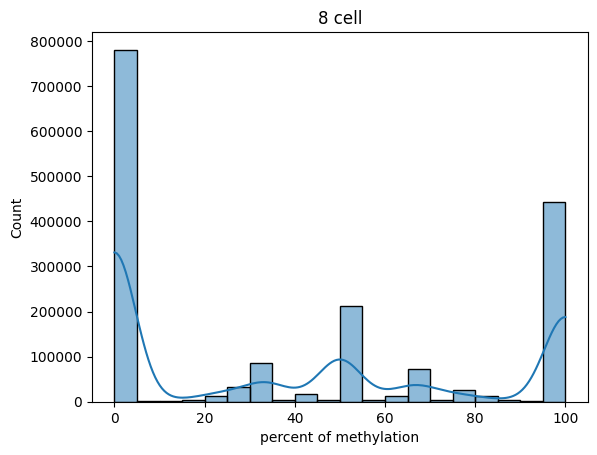

In [ ]:
sns.histplot(data = s_8_cell, x = 'percent of methylation', bins = 20, kde = True, kde_kws = {'bw_adjust': 2})
plt.title('8 cell')
plt.savefig('8_cell.png')

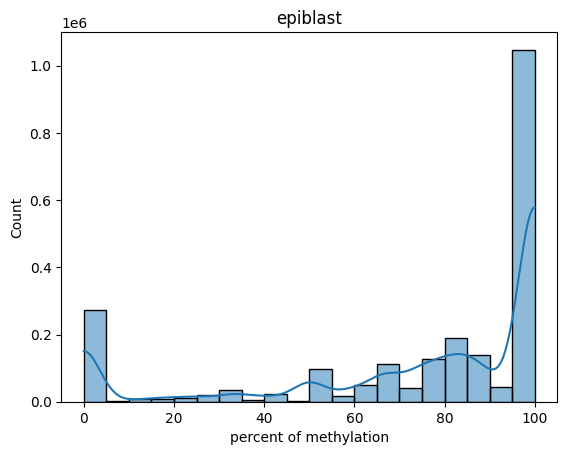

In [ ]:
sns.histplot(data = epiblast, x = 'percent of methylation', bins = 20, kde = True, kde_kws = {'bw_adjust': 2})
plt.title('epiblast')
plt.savefig('epiblast.png')

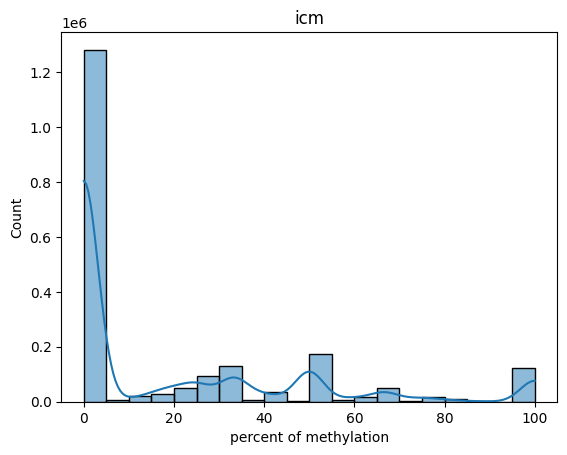

In [ ]:
sns.histplot(data = icm, x = 'percent of methylation', bins = 20, kde = True, kde_kws = {'bw_adjust': 2})
plt.title('icm')
plt.savefig('icm.png')

### Уровень покрытия и метелирования

In [ ]:
! bedGraphToBigWig  s_8_cell.deduplicated.bedGraph mm10.chrom.sizes s_8_cell_methylation.bigWig.bw
! bedGraphToBigWig  s_epiblast.deduplicated.bedGraph mm10.chrom.sizes epiblast_methylation.bigWig.bw
! bedGraphToBigWig  s_icm.deduplicated.bedGraph mm10.chrom.sizes icm_methylation.bigWig.bw

In [ ]:
! bedGraphToBigWig   s_8_cell.cover.bedGraph mm10.chrom.sizes s_8_cell_coverage.bigWig.bw
! bedGraphToBigWig   s_epiblast.cover.bedGraph mm10.chrom.sizes epiblast_coverage.bigWig.bw
! bedGraphToBigWig   s_icm.cover.bedGraph mm10.chrom.sizes icm_coverage.bigWig.bw

In [ ]:
! make_tracks_file --trackFiles s_8_cell_coverage.bigWig.bw epiblast_coverage.bigWig.bw icm_coverage.bigWig.bw -o tracks_cov.ini.txt

Adding bigwig file: s_8_cell_coverage.bigWig.bw
Adding bigwig file: epiblast_coverage.bigWig.bw
Adding bigwig file: icm_coverage.bigWig.bw


In [ ]:
! make_tracks_file --trackFiles s_8_cell_methylation.bigWig.bw epiblast_methylation.bigWig.bw icm_methylation.bigWig.bw -o tracks_met.ini.txt

Adding bigwig file: s_8_cell_methylation.bigWig.bw
Adding bigwig file: epiblast_methylation.bigWig.bw
Adding bigwig file: icm_methylation.bigWig.bw


In [ ]:
! pyGenomeTracks --tracks tracks_cov.ini.txt --region chr11:3100030-3500030 -o image_cov.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [s_8_cell_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [icm_coverage.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.02244281768798828
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [s_8_cell_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [icm_coverage.bigWig]


In [ ]:
! pyGenomeTracks --tracks tracks_met.ini.txt --region chr11:3100030-3500030 -o image_met.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [s_8_cell_methylation.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_methylation.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [icm_methylation.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.01838374137878418
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [s_8_cell_methylation.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_methylation.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [icm_methylation.bigWig]
